<a href="https://colab.research.google.com/github/Amaljayaranga/Segmentation/blob/master/Unet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

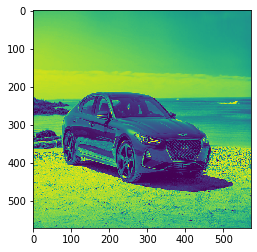

torch.Size([2, 388, 388])
tensor([[-14.8191, -14.7497, -14.8198,  ..., -14.3928, -14.4085, -14.3942],
        [-14.6254, -14.8647, -14.6270,  ..., -14.5059, -14.2746, -14.5020],
        [-14.8073, -14.7440, -14.8145,  ..., -14.3857, -14.4124, -14.3912],
        ...,
        [-14.7331, -15.0146, -14.5795,  ..., -14.8136, -14.5096, -14.7361],
        [-14.8335, -14.7390, -14.8871,  ..., -14.7436, -14.7881, -14.6449],
        [-14.5027, -14.8918, -14.6966,  ..., -14.9672, -14.7606, -14.8758]],
       grad_fn=<SelectBackward>)
tensor([[-11.7580, -11.7061, -11.7651,  ..., -12.0378, -12.1465, -12.0437],
        [-11.8159, -11.6151, -11.8020,  ..., -12.0057, -12.1705, -12.0220],
        [-11.7485, -11.7062, -11.7554,  ..., -12.0345, -12.1392, -12.0338],
        ...,
        [-11.6389, -11.7904, -11.4891,  ..., -11.6116, -11.7120, -11.6069],
        [-12.3363, -11.6866, -11.7643,  ..., -11.6076, -11.7311, -11.8526],
        [-11.7583, -12.1827, -11.9597,  ..., -11.7515, -11.9720, -11.6180]],
 

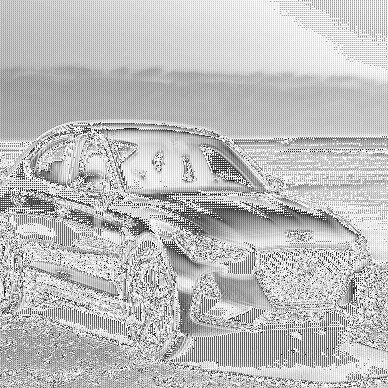

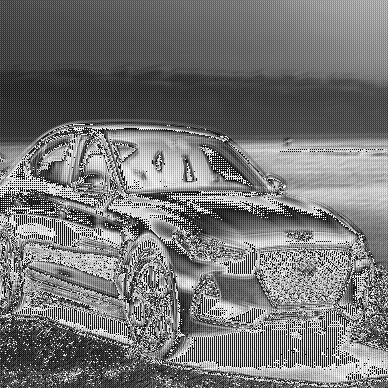

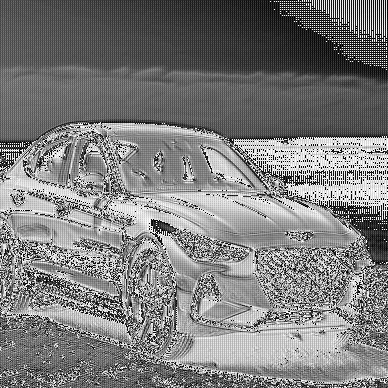

In [32]:
from torch._C import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt



class Unet(nn.Module):

    def __init__(self):
        super(Unet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=0)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=0)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=0)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=0)

        self.conv7 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0)
        self.conv8 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=0)

        self.conv9 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, padding=0)
        self.conv10 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, padding=0)

        self.upconv5 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=2, stride=2, padding=0,
                                          output_padding=0)

        self.conv11 = nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=0)
        self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=0)

        self.upconv4 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=2, stride=2, padding=0,
                                          output_padding=0)

        self.conv13 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=0)
        self.conv14 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=0)

        self.upconv3 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=2, stride=2, padding=0,
                                          output_padding=0)

        self.conv15 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=0)
        self.conv16 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=0)

        self.upconv2 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2, stride=2, padding=0,
                                          output_padding=0)

        self.conv17 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=0)
        self.conv18 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=0)

        self.conv19 = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=1, padding=0)

    def crop(self, up, cross):
        lower = int((cross.shape[2] - up.shape[2]) / 2)
        upper = int(cross.shape[2] - lower)
        cross = cross[:, :, lower:upper, lower:upper]
        return cross

    def forward(self, x):
        # 1,2 conv
        con1 = F.relu(self.conv1(x))
        # print(con1.size())
        con2 = F.relu(self.conv2(con1))
        # print(con2.size())

        # maxpool 1
        con2mp = F.max_pool2d(con2, kernel_size=2, stride=2)
        # print(con2mp.size())

        # 3,4 conv
        con3 = F.relu(self.conv3(con2mp))
        # print(con3.size())
        con4 = F.relu(self.conv4(con3))
        # print(con4.size())

        # maxpool 2
        con4mp = F.max_pool2d(con4, kernel_size=2, stride=2)
        # print(con4mp.size())

        # 5,6 conv
        con5 = F.relu(self.conv5(con4mp))
        # print(con5.size())
        con6 = F.relu(self.conv6(con5))
        # print(con6.size())

        # maxpool 3
        con6mp = F.max_pool2d(con6, kernel_size=2, stride=2)
        # print(con6mp.size())

        # 7,8 conv
        con7 = F.relu(self.conv7(con6mp))
        # print(con7.size())
        con8 = F.relu(self.conv8(con7))
        # print(con8.size())

        # maxpool 3
        con8mp = F.max_pool2d(con8, kernel_size=2, stride=2)
        # print(con8mp.size())

        # 9,10 conv
        con9 = F.relu(self.conv9(con8mp))
        # print(con9.size())
        con10 = F.relu(self.conv10(con9))
        # print(con10.size())

        # up5
        up5 = self.upconv5(con10)

        up5con = torch.cat([up5, self.crop(up5, con8)], 1)
        # print(up5con.size())

        # 11,12 conv
        con11 = F.relu(self.conv11(up5con))
        con12 = F.relu(self.conv12(con11))

        # up4
        up4 = self.upconv4(con12)
        up4con = torch.cat([up4, self.crop(up4, con6)], 1)
        # print(up4con.size())

        # 13,14 conv
        con13 = F.relu(self.conv13(up4con))
        con14 = F.relu(self.conv14(con13))

        # up3
        up3 = self.upconv3(con14)
        up3con = torch.cat([up3, self.crop(up3, con4)], 1)
        # print(up3con.size())

        # 15,16 conv
        con15 = F.relu(self.conv15(up3con))
        # print(con15.size())
        con16 = F.relu(self.conv16(con15))
        # print(con16.size())

        # up2
        up2 = self.upconv2(con16)
        # print(up2.size())

        up2con = torch.cat([up2, self.crop(up2, con2)], 1)
        # print(up2con.size())

        # 17,18 conv
        con17 = F.relu(self.conv17(up2con))
        # print(con17.size())
        con18 = F.relu(self.conv18(con17))
        # print(con17.size())

        result = self.conv19(con18)
        # print(result.size())
        return result


unet = Unet()
optimizer = optim.SGD(unet.parameters(), lr=0.01, momentum=0.99)

img = cv2.imread('car.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()



pil2tensor = transforms.ToTensor()
img = pil2tensor(img)


img = torch.unsqueeze(img, dim=0)


new_img = unet(img)
new_img1 = torch.squeeze(new_img)

new_img1 = new_img1*255
print(new_img1.shape)
print(new_img1[0])
print(new_img1[1])





im = transforms.ToPILImage()(new_img1)
display(im)

im1 = transforms.ToPILImage()(new_img1[0])
display(im1)

im2 = transforms.ToPILImage()(new_img1[1])
display(im2)


# New Section